In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from numba import jit

# Locality of reference

Numba: https://numba.pydata.org/numba-doc/latest/user/jit.html#nopython

In [ ]:
@jit(nopython=True)
def matmul(a, b):
    n = a.shape[0]
    k = a.shape[1]
    m = b.shape[1]
    c = np.zeros((n, m))
    for i in range(n):
      for j in range(m):
        for s in range(k):
            c[i, j] += a[i, s] * b[s, j]

    return c

In [ ]:
@jit(nopython=True)
def new_matmul(a, b):
    n = a.shape[0]
    k = a.shape[1]
    m = b.shape[1]
    c = np.zeros((n, m))
    for i in range(n):
      for s in range(k):
        for j in range(m):
          c[i,j] += a[i,s] * b[s,j]

    return c

In [ ]:
n=3
a = np.random.randn(n, n)
b = np.random.randn(n, n)
matmul(a,b), new_matmul(a,b)

(array([[-0.30810568, -0.63900952,  1.95022127],
        [-0.09233397,  0.44935688, -1.43160293],
        [ 1.29714571,  1.1222406 , -3.37501124]]),
 array([[-0.30810568, -0.63900952,  1.95022127],
        [-0.09233397,  0.44935688, -1.43160293],
        [ 1.29714571,  1.1222406 , -3.37501124]]))

In [ ]:
n=100
a = np.random.randn(n, n)
b = np.random.randn(n, n)
np.allclose(matmul(a,b), new_matmul(a,b))

True

In [ ]:
%timeit new_matmul(a,b)

387 µs ± 164 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%timeit matmul(a,b)

1.73 ms ± 417 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
dim_range = range(500, 1100, 100)
time_range_matmul = []
time_range_new_matmul = []
for n in dim_range:
    print("Dimension = {}".format(n))
    a = np.random.randn(n, n)
    b = np.random.randn(n, n)

    t = %timeit -o -q matmul(a, b)
    time_range_matmul.append(t.average)

    t = %timeit -o -q new_matmul(a, b)
    time_range_new_matmul.append(t.average)

Dimension = 500
Dimension = 600
Dimension = 700
Dimension = 800
Dimension = 900
Dimension = 1000


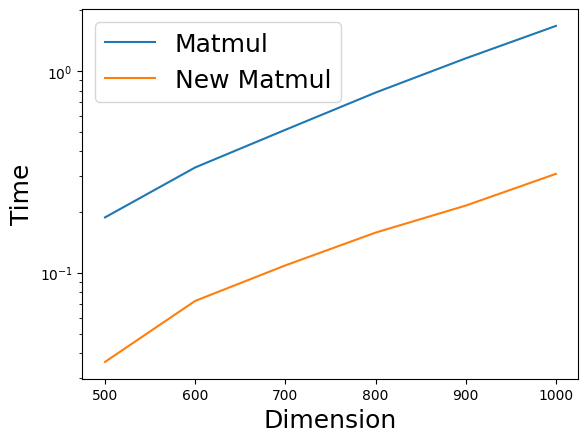

In [ ]:
plt.plot(dim_range, time_range_matmul, label="Matmul")
plt.plot(dim_range, time_range_new_matmul, label="New Matmul")
plt.legend(fontsize=18)
plt.xlabel("Dimension", fontsize=18)
plt.ylabel("Time", fontsize=18)
plt.yscale("log")

Explanation: https://en.wikipedia.org/wiki/Locality_of_reference#Matrix_multiplication

# CUDA

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
a = torch.randn(n, n, device='cuda')
a = torch.randn(n, n).to(device)
a = torch.randn(n, n).cuda()

In [ ]:
a = torch.randn((100,1000),device="cuda")
b = torch.randn((1000,100),device="cpu")
a @ b

RuntimeError: ignored

In [ ]:
n=1000
torch.manual_seed(42)
a = torch.randn(n, n)
b = torch.randn(n, n)

In [ ]:
%timeit a @ b

69.6 ms ± 16.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
n=1000
torch.manual_seed(42)
a = torch.randn(n, n, device='cuda')
b = torch.randn(n, n, device='cuda')

In [ ]:
%timeit a @ b

668 µs ± 14.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Powers of 2

In [ ]:
n = 2**10
a = torch.randn(n, n, device='cuda')
b = torch.randn(n, n, device='cuda')

In [ ]:
%timeit a @ b

688 µs ± 14.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
n = 2**10 -2
a = torch.randn(n, n, device='cuda')
b = torch.randn(n, n, device='cuda')

In [ ]:
%timeit a @ b

724 µs ± 7.29 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
